# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df_class = pd.read_csv('classification.csv')
df_reg = pd.read_csv('regression.csv')

/tmp/ipython-input-3011999291.py:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg = pd.read_csv('regression.csv')


Датасет для классификации (Air Quality & Health Impact Analysis):
* **RecordID:** Уникальный идентификатор, присваиваемый каждой записи
* **AQI:** Индекс качества воздуха, показывающий, насколько загрязнен воздух в настоящее время или насколько загрязненным он, по прогнозам, станет в будущем
* **PM10**:  Концентрация твердых частиц диаметром менее 10 микрометров (μg/m³)
* **PM2_5**: Концентрация твердых частиц диаметром менее 2,5 микрометров (μg/m³)
* **NO2**: Концентрация диоксида азота (ppb)
* **SO2**: Концентрация диоксида серы (ppb)
* **O3**: Концентрация озона (ppb)
* **Temperature**: Температура в градусах Цельсия (°C)
* **Humidity**: Процент влажности (%)
* **WindSpeed**: Скорость ветра (m/s)
* **RespiratoryCases**: Количество зарегистрированных респираторных случаев.
* **CardiovascularCases**: Количество зарегистрированных сердечно-сосудистых случаев
* **HospitalAdmissions**: Количество зарегистрированных случаев госпитализации
* **Target Variable: HealthImpactClass**

Датасет для регрессии (Electrity Prices):
* **DateTime**: дата и время
* **Holiday**: название праздника, если день нерабочий день
* **HolidayFlag**: целое число, 1, если день нерабочий день, ноль в противном случае
* **DayOfWeek**: целое число (0-6), 0 понедельник, день недели
* **WeekOfYear**: текущая неделя в течение года, начинающегося с этой даты
* **Day integer**: день
* **Month integer**: месяц
* **Year integer**: год
* **PeriodOfDay**: период суток
* **ForecastWindProduction**: прогнозируемая мощность ветра на этот период
* **SystemLoadEA**: национальный прогноз нагрузки на этот период
* **SMPEA**: прогноз цен на данный период
* **ORKTemperature**: фактическая температура
* **ORKWindspeed**: фактическая скорость ветра
* **CO2Intensity**: фактическая интенсивность выбросов CO2 в произведенной электроэнергии (г/кВт*ч)
* **ActualWindProduction**: фактическая нагрузка на национальную систему за этот период
* **SystemLoadEP2**: фактическая цена за данный период времени, прогнозируемое значение.
* **Target Variable: SystemLoadEP2**

## Создание бейзлайна

### Классификация

In [3]:
df_class

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [4]:
# Выделение таргета
X_class = df_class.drop(['HealthImpactClass','HealthImpactScore','RecordID'], axis=1)
y_class = df_class['HealthImpactClass']

In [5]:
# Сплит данных на тренировочные и тестовые
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [14]:
# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train_class, y_train_class)

KNeighborsClassifier(n_neighbors=2)

In [15]:
# Предсказанный класс
y_pred_class = knn_classifier.predict(X_test_class)

In [16]:
# Оценка качества модели
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f"Точность модели KNN для классификации: {accuracy_class:.4f}")

Точность модели KNN для классификации: 0.8870


### Регрессия

In [27]:
df_reg

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


In [18]:
# Выделение таргета
X_reg = df_reg.drop(['SMPEP2', 'DateTime','Holiday'], axis=1, errors='ignore')
y_reg = df_reg['SMPEP2']

In [19]:
# Преобразование всех колонок к числовому виду
for col in X_reg.columns:
    X_reg[col] = pd.to_numeric(X_reg[col], errors='coerce')

y_reg = pd.to_numeric(y_reg, errors='coerce')

In [20]:
# Избавиться от Nan значений
X_reg = X_reg.fillna(0)
y_reg = y_reg.fillna(0)

In [21]:
# Сплит данных на тренировочные и тестовые
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [22]:
# KNN регргессор
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)

KNeighborsRegressor()

In [23]:
# Предикт
y_pred_reg = knn_regressor.predict(X_test_reg)

In [24]:
# Оценка модели
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Среднеквадратичная ошибка (MSE) модели KNN для регрессии: {mse_reg:.4f}")

Среднеквадратичная ошибка (MSE) модели KNN для регрессии: 713.4466


## Улучшение бейзлайна

In [25]:
df_class = pd.read_csv('classification.csv')
df_reg = pd.read_csv('regression.csv')

/tmp/ipython-input-3011999291.py:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg = pd.read_csv('regression.csv')


### Классификация

In [26]:
df_class

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [28]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [29]:
# Проверка пустых значений
df_class.isna().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


/tmp/ipython-input-17067383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HealthImpactClass', data=df_class, palette='viridis')


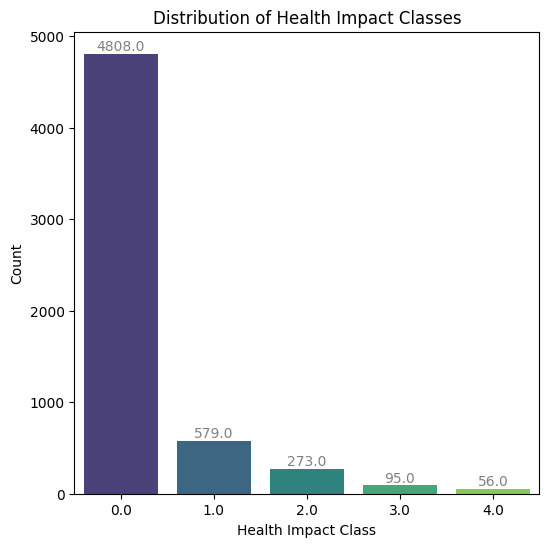

In [30]:
# Распределение классов воздуха
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='HealthImpactClass', data=df_class, palette='viridis')
plt.title('Distribution of Health Impact Classes')
plt.xlabel('Health Impact Class')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

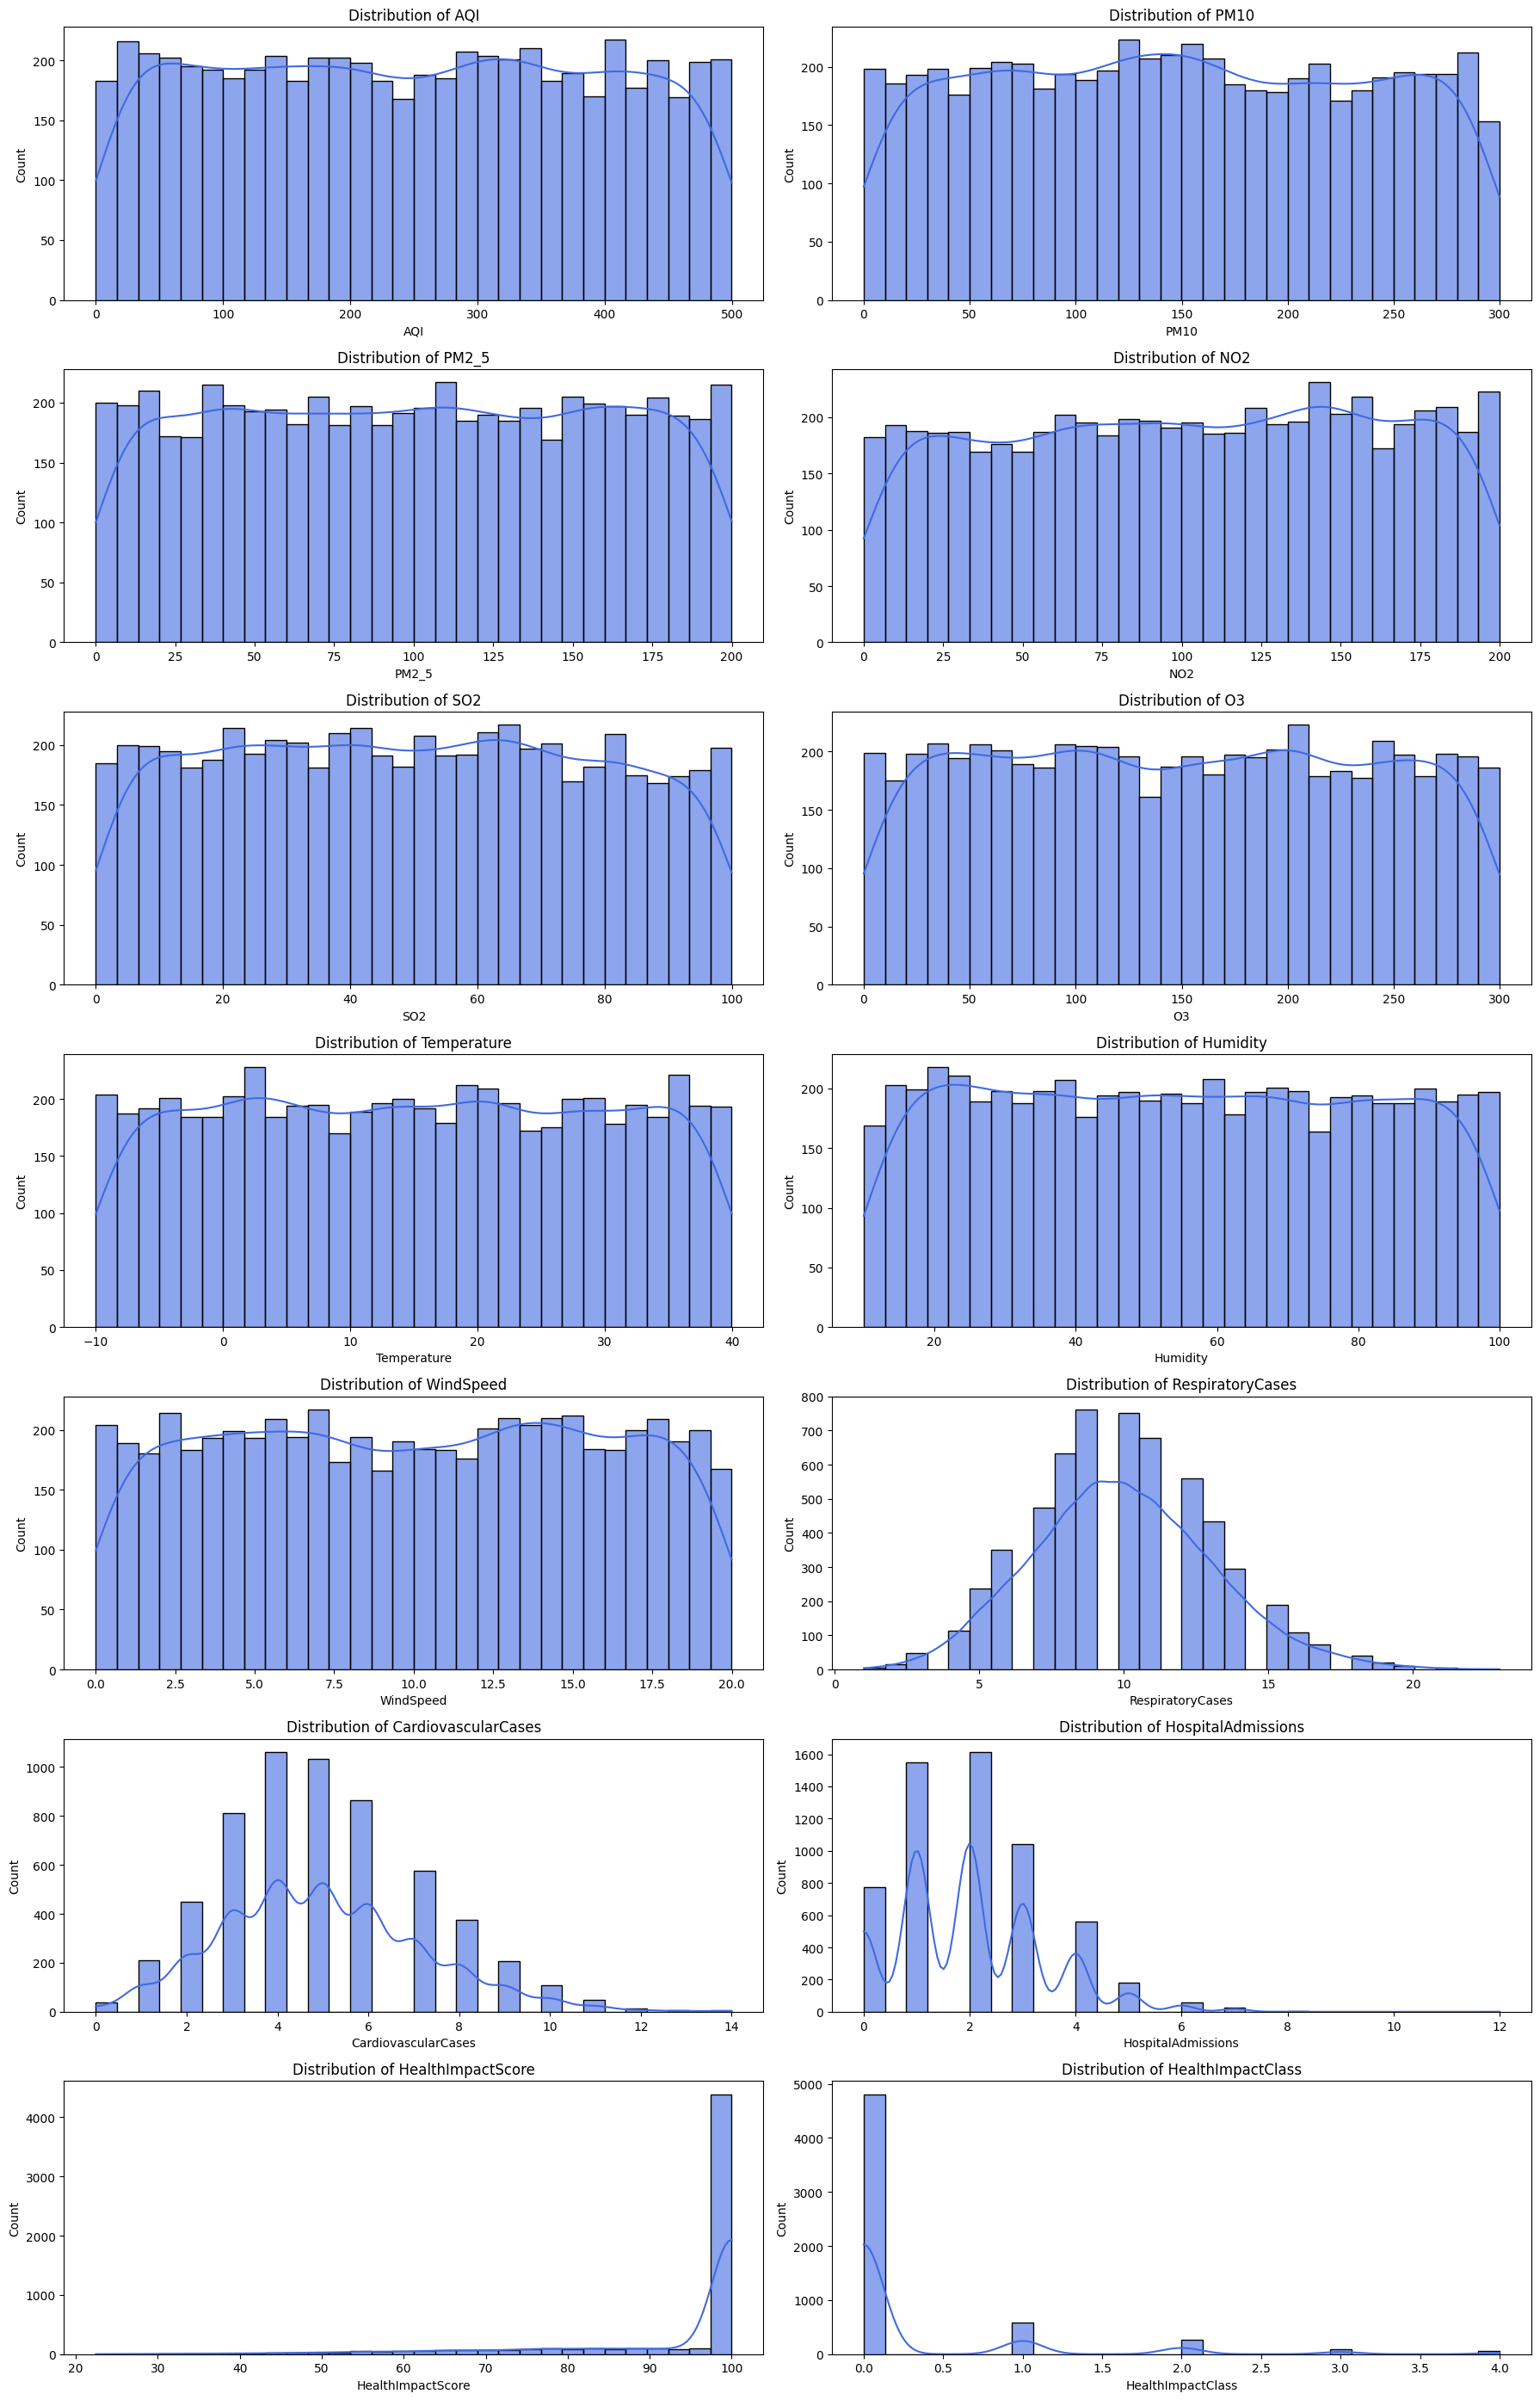

In [32]:
# Распределение значений фичей
df = df_class.drop(columns=["RecordID"], errors="ignore")

numerical_columns = df.select_dtypes(include="number").columns


num_features = len(numerical_columns)
num_cols = 2
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, bins=30, color="royalblue", alpha=0.6, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=12)
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

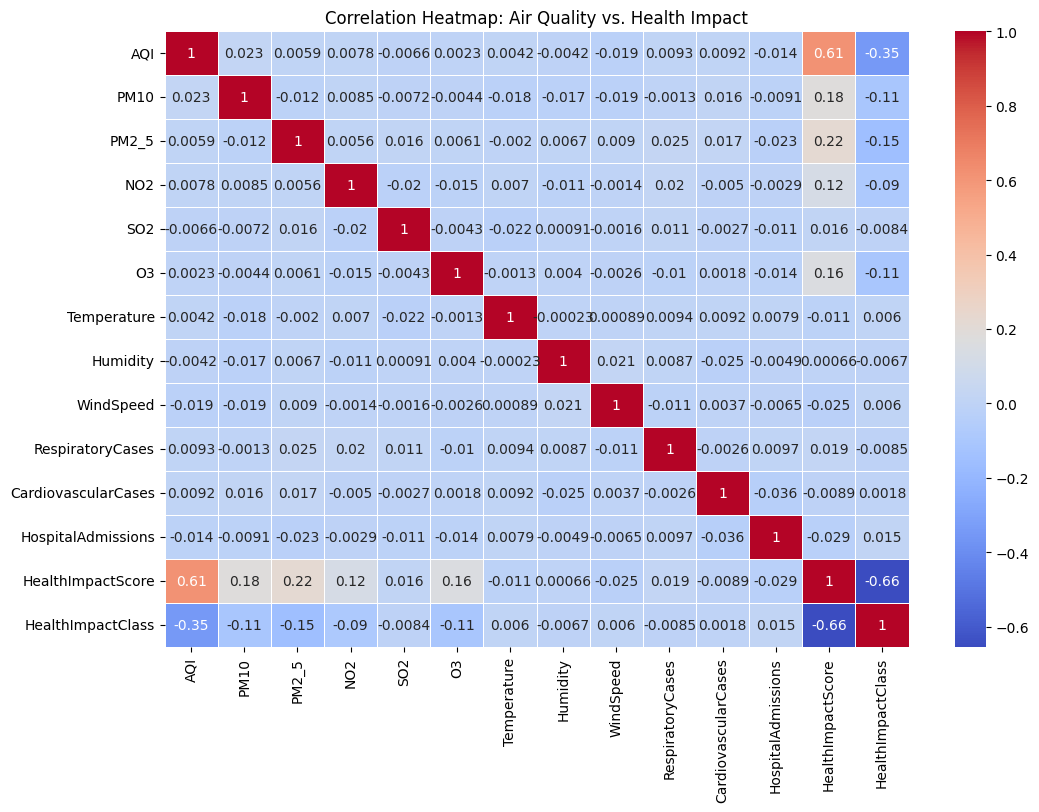

In [33]:
# Матрица корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Air Quality vs. Health Impact")
plt.show()

In [34]:
df = df_class.drop(columns=["RecordID"], errors="ignore")

# Дополнительные столбцы
low_PM2_5 = df["PM2_5"].quantile(0.25)
strong_PM2_5 = df["PM2_5"].quantile(0.75)
df["LowPM2_5"] = (df["PM2_5"] <= low_PM2_5).astype(int)
df["StrongPM2_5"] = (df["PM2_5"] >= strong_PM2_5).astype(int)

low_PM10 = df["PM10"].quantile(0.25)
strong_PM10 = df["PM10"].quantile(0.75)
df["LowPM10"] = (df["PM10"] <= low_PM10).astype(int)
df["StrongPM10"] = (df["PM10"] >= strong_PM10).astype(int)


low_AQI = df["AQI"].quantile(0.25)
strong_AQI = df["AQI"].quantile(0.75)
df["LowAQI"] = (df["AQI"] <= low_AQI).astype(int)
df["StrongAQI"] = (df["AQI"] >= strong_AQI).astype(int)

df = df.drop(columns=["RespiratoryCases", "CardiovascularCases","WindSpeed","Temperature","Humidity",'PM2_5'], axis=1)


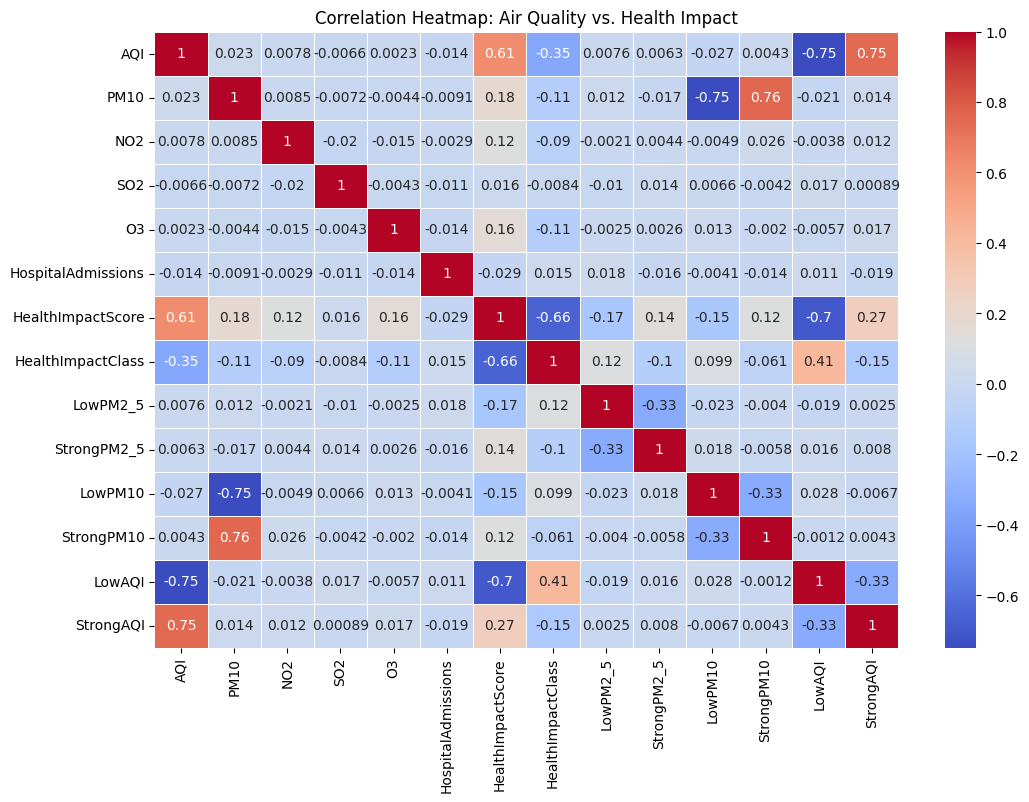

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Air Quality vs. Health Impact")
plt.show()

Топ 10 признаков, наиболее коррелирующих с целевой переменной:
HealthImpactClass     1.000000
LowAQI                0.413212
LowPM2_5              0.116562
LowPM10               0.099308
HospitalAdmissions    0.014873
SO2                  -0.008364
StrongPM10           -0.060983
NO2                  -0.090387
StrongPM2_5          -0.103282
PM10                 -0.108271
Name: HealthImpactClass, dtype: float64

Наименее коррелирующие:
HospitalAdmissions    0.014873
SO2                  -0.008364
StrongPM10           -0.060983
NO2                  -0.090387
StrongPM2_5          -0.103282
PM10                 -0.108271
O3                   -0.110093
StrongAQI            -0.147251
AQI                  -0.348106
HealthImpactScore    -0.655611
Name: HealthImpactClass, dtype: float64


/tmp/ipython-input-2608639035.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


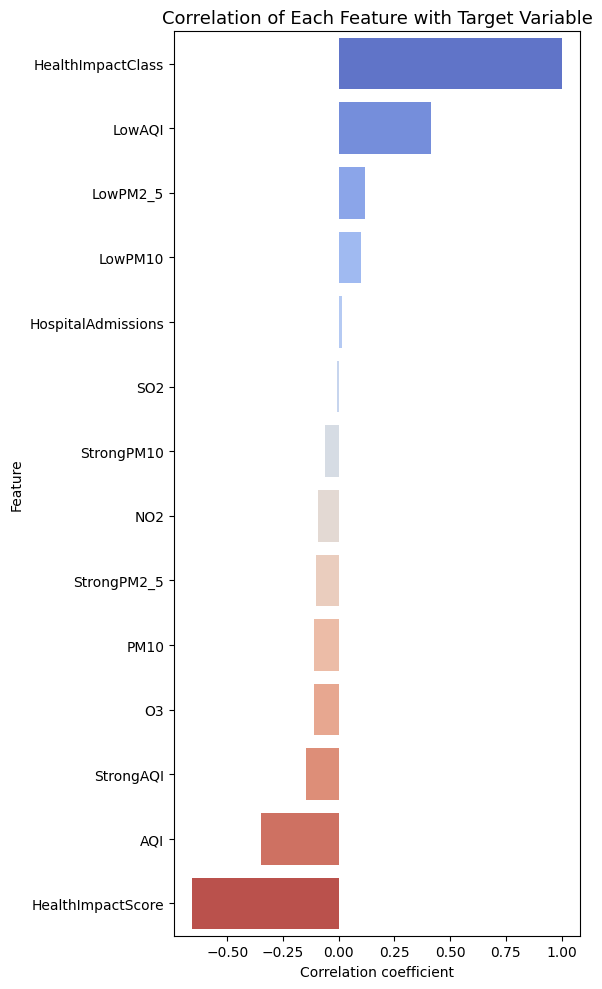

In [36]:
corr = df.corr(numeric_only=True)

target_corr = corr["HealthImpactClass"].sort_values(ascending=False)

print("Топ 10 признаков, наиболее коррелирующих с целевой переменной:")
print(target_corr.head(10))
print("\nНаименее коррелирующие:")
print(target_corr.tail(10))

plt.figure(figsize=(6, 10))
sns.barplot(
    y=target_corr.index,
    x=target_corr.values,
    palette="coolwarm"
)
plt.title("Correlation of Each Feature with Target Variable", fontsize=13)
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [37]:
df = df[[
    "HealthImpactClass",
    "LowAQI",
    "LowPM2_5",
    "LowPM10",
    "StrongPM2_5",
    "PM10",
    "O3",
    "StrongAQI",
    "AQI",
    "HealthImpactScore"
]]

# Выделение таргета
X_class = df.drop(['HealthImpactClass','HealthImpactScore'], axis=1)
y_class = df['HealthImpactClass']

In [38]:
# Сплит данных на тренировочные и тестовые
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [39]:
# Масштабирование данных
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_class)

X_test_scaled = scaler.transform(X_test_class)

In [40]:
mx_k, mx_acc = 0,0
for k in range(1,20):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train_scaled, y_train_class)
  y_pred_class = knn_classifier.predict(X_test_scaled)
  accuracy_class = accuracy_score(y_test_class, y_pred_class)
  if(accuracy_class > mx_acc):
    mx_k = k
    mx_acc = accuracy_class


knn_classifier = KNeighborsClassifier(n_neighbors=mx_k)
knn_classifier.fit(X_train_scaled, y_train_class)
y_pred_class = knn_classifier.predict(X_test_scaled)
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f"k = {mx_k}, Точность модели KNN для классификации: {accuracy_class:.4f}")

k = 6, Точность модели KNN для классификации: 0.8847


### Регрессия

In [41]:
df_reg

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


In [42]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [43]:
df_reg['ForecastWindProduction'] = pd.to_numeric(df_reg['ForecastWindProduction'], errors='coerce')
df_reg['SystemLoadEA'] = pd.to_numeric(df_reg['SystemLoadEA'], errors='coerce')
df_reg['SMPEA'] = pd.to_numeric(df_reg['SMPEA'], errors='coerce')
df_reg['ORKTemperature'] = pd.to_numeric(df_reg['ORKTemperature'], errors='coerce')
df_reg['ORKWindspeed'] = pd.to_numeric(df_reg['ORKWindspeed'], errors='coerce')
df_reg['CO2Intensity'] = pd.to_numeric(df_reg['CO2Intensity'], errors='coerce')
df_reg['ActualWindProduction'] = pd.to_numeric(df_reg['ActualWindProduction'], errors='coerce')
df_reg['SystemLoadEP2'] = pd.to_numeric(df_reg['SystemLoadEP2'], errors='coerce')
df_reg['SMPEP2'] = pd.to_numeric(df_reg['SMPEP2'], errors='coerce')

In [44]:
df_reg = df_reg.drop(["DateTime","Holiday"],axis = 1)

In [45]:
df_reg = df_reg.dropna()

In [46]:
df_reg.isnull().sum()

,0
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,0
SystemLoadEA,0
SMPEA,0


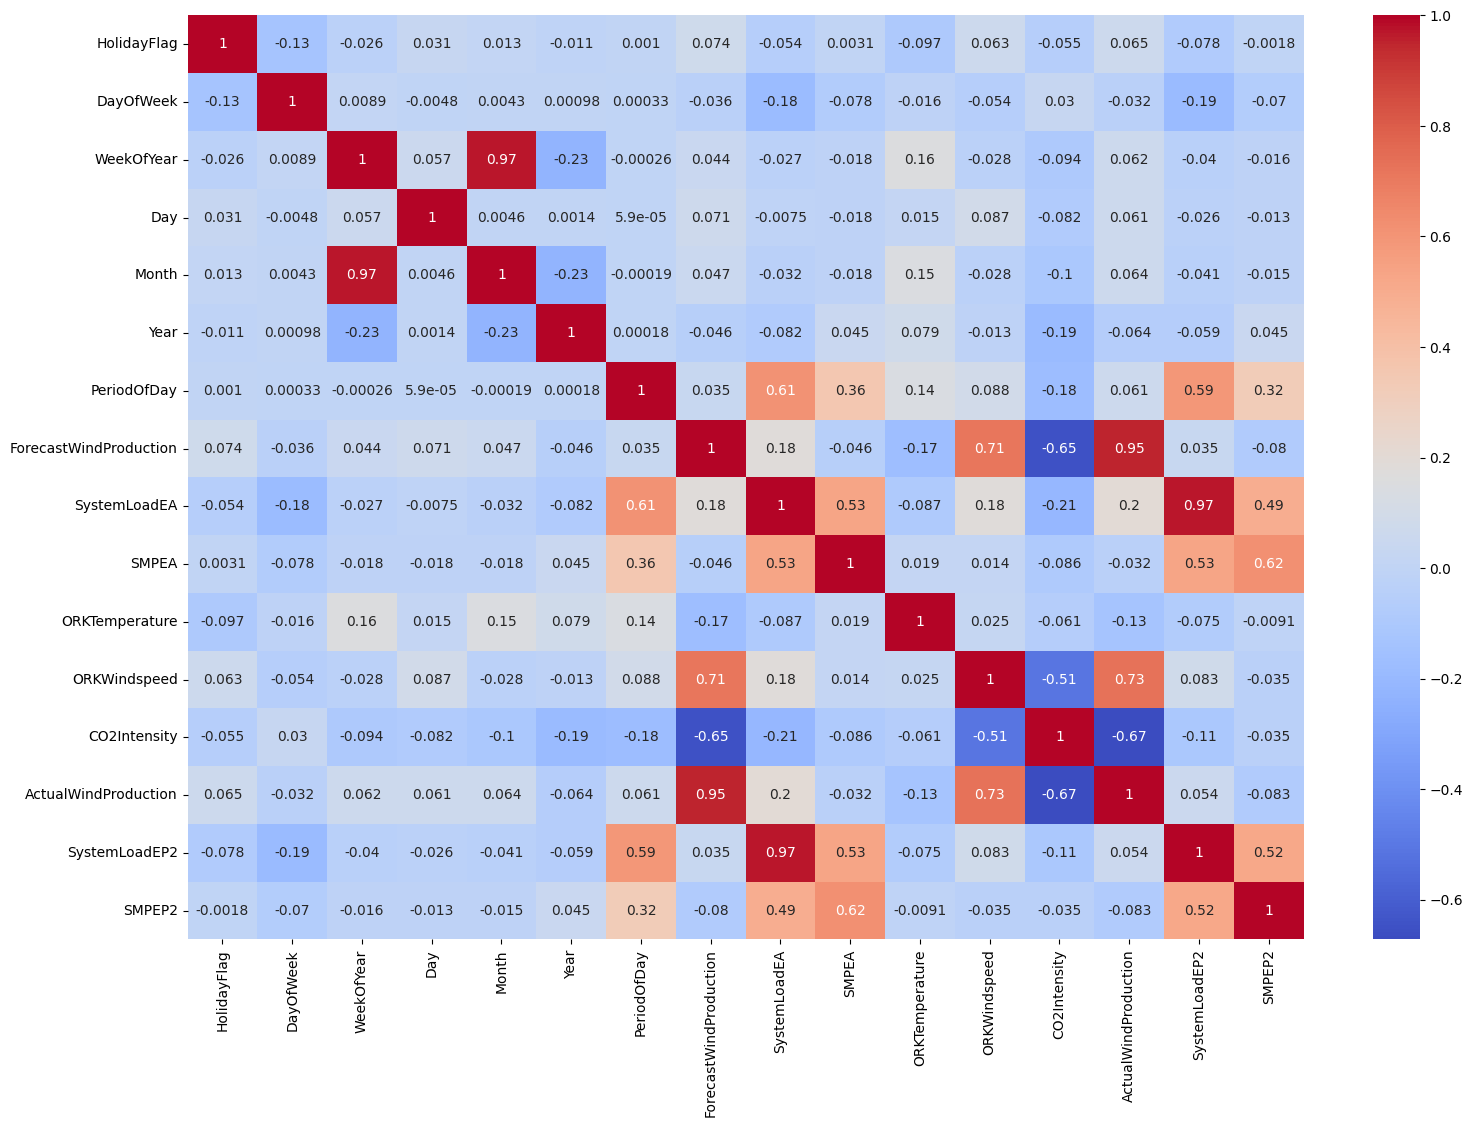

In [47]:
corr = df_reg.corr(method='pearson')
plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [48]:
df_reg.shape

(37682, 16)

<Axes: xlabel='SMPEP2', ylabel='Count'>

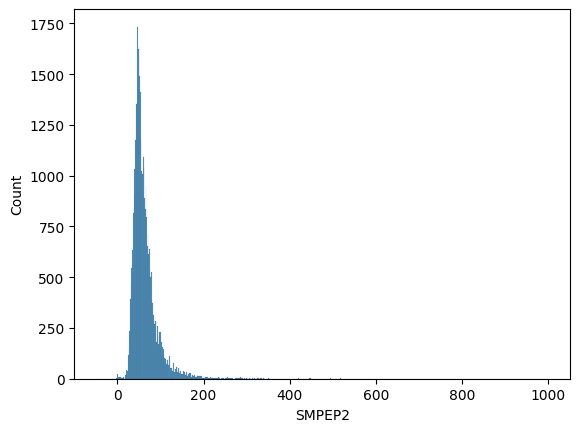

In [49]:
sns.histplot(df_reg['SMPEP2'])

In [50]:
df_reg['SMPEP2'].describe()

,SMPEP2
count,37682.000000
mean,64.181344
std,35.432265
min,-47.740000
25%,45.800000
50%,55.560000
75%,72.120000
max,1000.000000


In [51]:
df_reg[df_reg['SMPEP2'] <= 0].shape

(26, 16)

In [52]:
# Очистка от выбросов
df_reg = df_reg[df_reg['SMPEP2'] > 0]

In [53]:
df_reg[df_reg['SMPEP2'] > 500]

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
8432,0,1,17,24,4,2012,34,55.40,4866.69,113.29,6.0,9.3,569.75,144.0,4757.36,675.58
16884,0,2,42,17,10,2012,38,500.30,5412.97,473.82,10.0,29.6,510.96,419.0,5159.27,657.08
18743,0,6,47,25,11,2012,25,173.80,4400.63,59.34,8.0,16.7,574.00,136.0,4539.44,517.69
20673,0,4,1,4,1,2013,35,867.00,5781.16,127.33,9.0,16.7,382.99,812.0,5260.23,590.74
21489,0,0,4,21,1,2013,35,143.70,6444.79,291.57,2.0,3.7,487.71,54.0,6070.86,630.19
23193,0,1,9,26,2,2013,11,142.80,3370.41,44.18,1.0,13.0,580.92,86.0,3304.05,1000.00
23844,0,0,11,11,3,2013,38,983.10,5878.00,319.19,-1.0,27.8,414.26,769.0,5550.64,699.49
32673,0,2,37,11,9,2013,35,313.67,4564.16,80.91,18.0,29.6,428.11,480.0,4614.01,603.00
34718,0,3,43,24,10,2013,16,445.70,4525.49,75.90,13.0,18.5,438.15,284.0,4578.69,517.40
35697,0,2,46,13,11,2013,35,1491.11,5820.16,88.70,9.0,25.9,291.54,1479.0,5496.03,682.85


In [54]:
df_reg = df_reg[df_reg['SMPEP2'] != 1000]

In [55]:
# Выделение таргета
X_reg = df_reg.drop(['SMPEP2'], axis=1, errors='ignore')
y_reg = df_reg['SMPEP2']

In [56]:
# Сплит данных на тренировочные и тестовые
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [57]:
# Масштабирование данных
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_reg)

X_test_scaled = scaler.transform(X_test_reg)

In [58]:
mx_k, mx_mse = 1,1e9
for k in range(1,20):
  knn_regressor = KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled, y_train_reg)

  y_pred_reg = knn_regressor.predict(X_test_scaled)

  mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
  if(mse_reg < mx_mse):
    mx_mse = mse_reg
    mx_k = k


knn_regressor = KNeighborsRegressor(n_neighbors=mx_k)
knn_regressor.fit(X_train_scaled, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_scaled)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"k = {mx_k}, Среднеквадратичная ошибка (MSE) модели KNN для регрессии: {mse_reg:.4f}")

k = 4, Среднеквадратичная ошибка (MSE) модели KNN для регрессии: 526.7776


Стандартный бейзлайн:
* Точность модели KNN для классификации: **0.8870**
* MSE модели KNN для регрессии: **713.4466**

Улучшенный байзлайн:
* Точность модели KNN для классификации: **0.8847**
* MSE модели KNN для регрессии: **526.7776**

***Итог:*** удалось повысить качество моделей за счет препроцессинга, визуализации данных, формирования новых признаков, подбора гиперпараметров

## Имплементация алгоритма

In [59]:
df_class = pd.read_csv('classification.csv')
df_reg = pd.read_csv('regression.csv')

/tmp/ipython-input-3011999291.py:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg = pd.read_csv('regression.csv')


#### Реализация алгоритма KNN для классификации

In [60]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)

        predictions = [self._predict_single(x) for x in X]

        return np.array(predictions)

    def _predict_single(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)

        return most_common[0][0]

#### Реализация алгоритма KNN для регрессии

In [61]:
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)

        predictions = [self._predict_single(x) for x in X]

        return np.array(predictions)

    def _predict_single(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_values = self.y_train[k_indices]

        return np.mean(k_nearest_values)


In [62]:
X_class = df_class.drop(['HealthImpactClass','HealthImpactScore','RecordID'], axis=1)
y_class = df_class['HealthImpactClass']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# KNN
knn_classifier = KNNClassifier(k=2)
knn_classifier.fit(X_train_class, y_train_class)# Предсказанный класс
y_pred_class = knn_classifier.predict(X_test_class)
# Оценка качества модели
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f"Точность модели KNN для классификации: {accuracy_class:.4f}")

Точность модели KNN для классификации: 0.8549


In [63]:
# Выделение таргета
X_reg = df_reg.drop(['SMPEP2', 'DateTime','Holiday'], axis=1, errors='ignore')
y_reg = df_reg['SMPEP2']

# Преобразование всех колонок к числовому виду
for col in X_reg.columns:
    X_reg[col] = pd.to_numeric(X_reg[col], errors='coerce')

y_reg = pd.to_numeric(y_reg, errors='coerce')

# Избавиться от Nan значений
X_reg = X_reg.fillna(0)
y_reg = y_reg.fillna(0)

# Сплит данных на тренировочные и тестовые
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# KNN регргессор
knn_regressor = KNNRegressor(k=5)
knn_regressor.fit(X_train_reg, y_train_reg)
# Предикт
y_pred_reg = knn_regressor.predict(X_test_reg)
# Оценка модели
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Среднеквадратичная ошибка (MSE) модели KNN для регрессии: {mse_reg:.4f}")

Среднеквадратичная ошибка (MSE) модели KNN для регрессии: 713.4466


In [64]:
df_class = pd.read_csv('classification.csv')
df_reg = pd.read_csv('regression.csv')

/tmp/ipython-input-3011999291.py:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg = pd.read_csv('regression.csv')


In [65]:
df = df_class.drop(columns=["RecordID"], errors="ignore")

# Дополнительные столбцы
low_PM2_5 = df["PM2_5"].quantile(0.25)
strong_PM2_5 = df["PM2_5"].quantile(0.75)
df["LowPM2_5"] = (df["PM2_5"] <= low_PM2_5).astype(int)
df["StrongPM2_5"] = (df["PM2_5"] >= strong_PM2_5).astype(int)

low_PM10 = df["PM10"].quantile(0.25)
strong_PM10 = df["PM10"].quantile(0.75)
df["LowPM10"] = (df["PM10"] <= low_PM10).astype(int)
df["StrongPM10"] = (df["PM10"] >= strong_PM10).astype(int)


low_AQI = df["AQI"].quantile(0.25)
strong_AQI = df["AQI"].quantile(0.75)
df["LowAQI"] = (df["AQI"] <= low_AQI).astype(int)
df["StrongAQI"] = (df["AQI"] >= strong_AQI).astype(int)

df = df.drop(columns=["RespiratoryCases", "CardiovascularCases","WindSpeed","Temperature","Humidity",'PM2_5'], axis=1)

df = df[[
    "HealthImpactClass",
    "LowAQI",
    "LowPM2_5",
    "LowPM10",
    "StrongPM2_5",
    "PM10",
    "O3",
    "StrongAQI",
    "AQI",
    "HealthImpactScore"
]]

# Выделение таргета
X_class = df.drop(['HealthImpactClass','HealthImpactScore'], axis=1)
y_class = df['HealthImpactClass']

# Сплит данных на тренировочные и тестовые
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_class)

X_test_scaled = scaler.transform(X_test_class)

mx_k, mx_acc = 0,0
for k in range(1,20):
  knn_classifier = KNNClassifier(k=k)
  knn_classifier.fit(X_train_scaled, y_train_class)
  y_pred_class = knn_classifier.predict(X_test_scaled)
  accuracy_class = accuracy_score(y_test_class, y_pred_class)
  if(accuracy_class > mx_acc):
    mx_k = k
    mx_acc = accuracy_class


knn_classifier = KNNClassifier(k=mx_k)
knn_classifier.fit(X_train_scaled, y_train_class)
y_pred_class = knn_classifier.predict(X_test_scaled)
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f"k = {mx_k}, Точность модели KNN для классификации: {accuracy_class:.4f}")

k = 6, Точность модели KNN для классификации: 0.8825


In [66]:
df_reg['ForecastWindProduction'] = pd.to_numeric(df_reg['ForecastWindProduction'], errors='coerce')
df_reg['SystemLoadEA'] = pd.to_numeric(df_reg['SystemLoadEA'], errors='coerce')
df_reg['SMPEA'] = pd.to_numeric(df_reg['SMPEA'], errors='coerce')
df_reg['ORKTemperature'] = pd.to_numeric(df_reg['ORKTemperature'], errors='coerce')
df_reg['ORKWindspeed'] = pd.to_numeric(df_reg['ORKWindspeed'], errors='coerce')
df_reg['CO2Intensity'] = pd.to_numeric(df_reg['CO2Intensity'], errors='coerce')
df_reg['ActualWindProduction'] = pd.to_numeric(df_reg['ActualWindProduction'], errors='coerce')
df_reg['SystemLoadEP2'] = pd.to_numeric(df_reg['SystemLoadEP2'], errors='coerce')
df_reg['SMPEP2'] = pd.to_numeric(df_reg['SMPEP2'], errors='coerce')

df_reg = df_reg.drop(["DateTime","Holiday"],axis = 1)

df_reg = df_reg.dropna()

df_reg = df_reg[df_reg['SMPEP2'] > 0]
df_reg = df_reg[df_reg['SMPEP2'] != 1000]

# Выделение таргета
X_reg = df_reg.drop(['SMPEP2'], axis=1, errors='ignore')
y_reg = df_reg['SMPEP2']

# Сплит данных на тренировочные и тестовые
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_reg)

X_test_scaled = scaler.transform(X_test_reg)

mx_k, mx_mse = 1,1e9
for k in range(1,20):
  knn_regressor = KNNRegressor(k=k)
  knn_regressor.fit(X_train_scaled, y_train_reg)

  y_pred_reg = knn_regressor.predict(X_test_scaled)

  mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
  if(mse_reg < mx_mse):
    mx_mse = mse_reg
    mx_k = k


knn_regressor = KNNRegressor(k=mx_k)
knn_regressor.fit(X_train_scaled, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_scaled)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"k = {mx_k}, Среднеквадратичная ошибка (MSE) модели KNN для регрессии: {mse_reg:.4f}")

k = 4, Среднеквадратичная ошибка (MSE) модели KNN для регрессии: 526.7776


**Стандартный бейзлайн:**

*Библиотечная реализация:*
* Точность модели KNN для классификации: 0.8870
* MSE модели KNN для регрессии: 713.4466

*Имплементация алгоритма:*
* Точность модели KNN для классификации: 0.8549
* Среднеквадратичная ошибка (MSE) модели KNN для регрессии: 713.7194


**Улучшенный байзлайн:**

*Библиотечная реализация:*
* Точность модели KNN для классификации: 0.8847
* MSE модели KNN для регрессии: 526.7776

Имплементация алгоритма:
* Точность модели KNN для классификации: 0.8825
* Среднеквадратичная ошибка (MSE) модели KNN для регрессии: 526.7776


Итог: удалось реализовать алгоритм близкий по точности к библиотечной реализации, но есть проблема с временем выполнения